Retrieval practice is when you actively try to remember something as a way of making sure that you learn it well. (Read more about it [here](http://pdf.retrievalpractice.org/RetrievalPracticeGuide.pdf)). Today I did that with the dogs vs cats example that the first two chapters cover.

We start with installing the `fastai` library and importing everything from the `vision` library. This was hard to remember since the pattern of `.all` and `importing *` is not something I've seen much in Python imports.

In [43]:
# !pip install fastai
from fastai.vision.all import *

Then we create the simple function that will be used to classify the images. The pets dataset relies on the first letter of the filename for knowing whether a picture is of a cat or a dog. So the function is pretty simple: it checks whether the first letter is a capital letter or not.

The simple `assert` testing was a little trick that I saw mentioned somewhere this past week. It's not a full-fledged test suite, but it's at least the *start* of something that can later be refactored out into whatever takes its place, be it using `pytest` or something else.

In [44]:
# define the function that'll classify the images
def is_cat(string):
    return string[0].isupper()

assert is_cat("abs") == False
assert is_cat("Abs") == True

Now we have to import the data for the files and apply whatever custom transforms we want applied to them.

I had certainly forgotten that `untar_data` was a method when I started out with this. I also am not familiar enough with the `pathlib` library as I need to be.

It's interesting that we actually don't even need to do any of the batch transformations on the images in order to get excellent results. I imagine that's because the task is so close to that of the original resnet architecture.

In [46]:
# import the data
path = untar_data(URLs.PETS)/'images'
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), label_func=is_cat, item_tfms=Resize(224))

Then it's all about passing the dataloaders object into the `cnn_learner` function, along with our desired architecture. We also set the `error_rate` (i.e. 1 minus the accuracy at making predictions) as the metric we'll see displayed in the output.

In [47]:
# instantiate a learner
learner = cnn_learner(dls, resnet34, metrics=error_rate)

# fine-tune the model
learner.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.140326,0.019799,0.008119,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.046906,0.021923,0.006089,00:24
1,0.041144,0.009382,0.004060,00:25
2,0.028892,0.004109,0.002030,00:25
3,0.008950,0.002290,0.001353,00:25
4,0.004486,0.002822,0.001353,00:25


And here you can see the results. In this training run, with 5 epochs, we were able to achieve a 99.9% accuracy. Not bad!

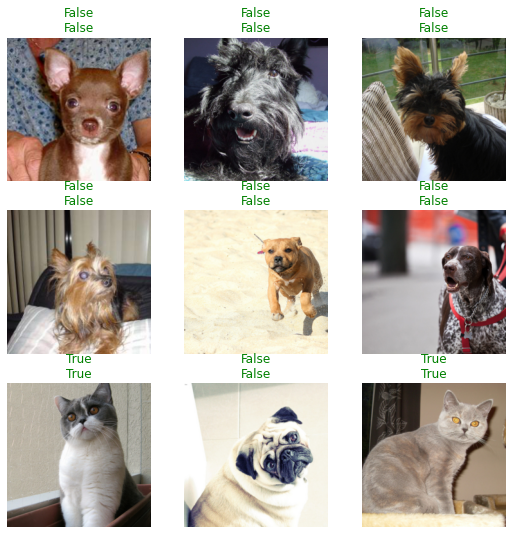

In [49]:
learner.show_results()